## Principal Component Analysis
Apply PCA for a dataset given in the url, build a classification model and plot the graph


In [ ]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import pickle
from sklearn.metrics import classification_report


In [2]:
# Importing the dataset

dataset = pd.read_csv('Dataset/Wine.csv')
x = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

In [3]:
# split dataset into train test  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

x_train,x_cv,y_train,y_cv=train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

In [4]:
# Feature Scaling

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
x_cv = sc.transform(x_cv)

In [5]:
# Applying PCA

pca = PCA(n_components = 2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
x_cv = pca.transform(x_cv)
explained_variance = pca.explained_variance_ratio_

In [6]:
# create pickle file for test data

file =open("PCA_test_data/test.pickle",'wb')
pickle.dump(x_test,file)
pickle.dump(y_test,file)
file.close()

In [14]:
# Fitting Logistic Regression to the Training set

classifier = LogisticRegression(random_state = 0)
classifier = classifier.fit(x_train, y_train)

In [8]:
# Predicting the Test set results

y_pred = classifier.predict(x_cv)

In [9]:
# Making the Confusion Matrix

cm = confusion_matrix(y_cv, y_pred)
print(cm)

[[ 9  0  0]
 [ 0 11  1]
 [ 0  0  8]]


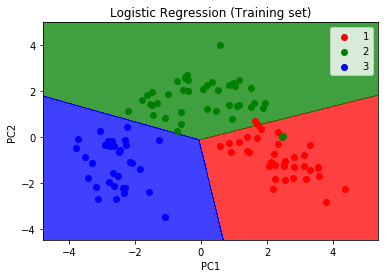

In [10]:
# Visualising the Training set results

X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

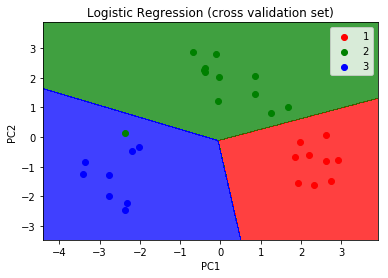

In [11]:
# Visualising the Training set results

X_set, y_set = x_cv, y_cv
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (cross validation set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [12]:
# Visualising the classification report

print("\n",classification_report(y_cv, y_pred))


              precision    recall  f1-score   support

          1       1.00      1.00      1.00         9
          2       1.00      0.92      0.96        12
          3       0.89      1.00      0.94         8

avg / total       0.97      0.97      0.97        29



In [16]:
# save model in pickle file

file =open("PCA_Model/Model.pickle",'wb')
pickle.dump(classifier,file)
file.close()
print("Pickle file create: Model.pickle")

Pickle file create: Model.pickle
